All required imports

In [1]:
import numpy as np
import matplotlib as plt
import sklearn
import os
import pandas as pd
#import keras

This loads data into pandas dataframes

In [2]:
try:
    root
except:
    root = os.getcwd()

data_path = os.path.join(root, "../skin-cancer-mnist-ham10000")

# the associated meta data
metadata = pd.read_csv(os.path.join(data_path, "HAM10000_metadata.csv"))

# the pixels RGB
X_pixels = pd.read_csv(os.path.join(data_path, "hmnist_28_28_RGB.csv"))

In [3]:
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
print(X_pixels.shape)
X_pixels.drop(['label'], axis=1,inplace = True)
X_pixels.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Reformat metadata into X_metadata, categorical variables turned into one hot encoding, non-features removed.
Also make variable y into the classifications

In [5]:
X_metadata = metadata.loc[:, ['dx_type', 'age', 'sex', 'localization']]
X_metadata = pd.get_dummies(data=X_metadata, columns=['dx_type', 'sex', 'localization'])
X_metadata.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,75.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = metadata.loc[:, 'dx']
y = pd.get_dummies(data=y, columns=['dx'])
y.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


Simply make X be the concatenation of X_pixels and X_metadata

In [7]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,80.0,0,0,0,1,0,1,0,0,0,...,134,173,124,138,183,147,166,185,154,177
1,80.0,0,0,0,1,0,1,0,0,0,...,82,60,39,55,25,14,28,25,14,27
2,80.0,0,0,0,1,0,1,0,0,0,...,149,167,129,143,159,124,142,136,104,117
3,80.0,0,0,0,1,0,1,0,0,0,...,73,44,26,36,25,12,17,25,12,15
4,75.0,0,0,0,1,0,1,0,0,0,...,201,209,166,185,172,135,149,109,78,92


This is going to be all of my analysis using CNN from keras: Samuel Stentz.

I am also going to be using some slight data augmentation to help make the classifier more robust

https://medium.com/datadriveninvestor/keras-imagedatagenerator-methods-an-easy-guide-550ecd3c0a92

This is the article some of this code is from which we should cite

In [8]:
# move all images to one directory
import shutil
im1 = os.path.join(data_path, "HAM10000_images_part_1")
im2 = os.path.join(data_path, "HAM10000_images_part_2")

i = 0
for im in os.listdir(im2):
    i += 1
    print(f"im {i} moved")
    shutil.move(os.path.join(im2,im), im1)

In [9]:
dataset = metadata.loc[:,["dx", "image_id"]]
dataset.columns = ["label", "filename"]

def to_jpg(x):
    return f"{x}.jpg"

dataset['filename'] = dataset['filename'].apply(lambda x: f"{x}.jpg")
dataset.head()

from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state = 42)
train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.2, random_state = 42)

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint

# where all the data comes from
train_data_dir = im1

# dimensions of our images.
img_width, img_height = 150, 150

nb_train_samples = 6409
nb_validation_samples = 1603
nb_test_samples = 2003
epochs = 50
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#############################################################################################################
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
##############################################################################################################
"""shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split"""

# this is the augmentation configuration we will use for training (Nothing!!!)
train_datagen = ImageDataGenerator(
    rescale=1./255
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# all the generators for train, val, and test
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_dataset,
    directory = train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    x_col = "filename",
    y_col = "label",
    class_mode='categorical')

validation_generator = train_datagen.flow_from_dataframe(
    dataframe = val_dataset,
    directory = train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    x_col = "filename",
    y_col = "label",
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_dataset,
    directory = train_data_dir,
    target_size= (img_height, img_width),
    batch_size= batch_size,
    x_col = "filename",
    y_col = "label",
    class_mode='categorical',
    shuffle = False)

Using TensorFlow backend.
/home/samuelstentz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/samuelstentz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/samuelstentz/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/samuelstentz/.local/lib/python3.6/site-pa


Found 6409 validated image filenames belonging to 7 classes.
Found 1603 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


This is the training of the model

In [ ]:
# save the model with best validation accuracy
mcp = ModelCheckpoint("best_validation.hdf5", monitor="val_accuracy", save_best_only=True, save_weights_only=False)

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size + 1,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size + 1,
    callbacks=[mcp])

model.save_weights('first_try.h5')

In [20]:
# load model and evaluate on test set
from tensorflow.keras.models import load_model

model.load_weights('best_validation_mobilenet.hdf5')

test_generator.reset()
y_pred = model.predict_generator(test_generator,steps= nb_test_samples // batch_size + 1)
y_pred = np.argmax(y_pred, axis=1)

In [21]:
label_map = test_generator.class_indices
reverse = dict()
for l in label_map:
    reverse[label_map[l]] = l

names = []
for number in reverse:
    names.append(reverse[number])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
labels = test_generator.classes

print('Confusion Matrix')
print(confusion_matrix(labels, y_pred))
print('\n\n\nClassification Report')
print(classification_report(labels, y_pred, target_names=names))
num_right = np.sum(labels == y_pred)
print(f"\nAccuracy {num_right / y_pred.shape[0]}")

Confusion Matrix
[[  24    3   16    0    7   19    0]
 [   3   33   19    0   13   24    1]
 [   7    6  105    0   16   93    1]
 [   0    0   10    0    1   15    2]
 [   7    3   32    0   44  140    0]
 [   5    8   39    1   31 1245    9]
 [   0    1    0    0    1   10    9]]



Classification Report
             precision    recall  f1-score   support

      akiec       0.52      0.35      0.42        69
        bcc       0.61      0.35      0.45        93
        bkl       0.48      0.46      0.47       228
         df       0.00      0.00      0.00        28
        mel       0.39      0.19      0.26       226
         nv       0.81      0.93      0.86      1338
       vasc       0.41      0.43      0.42        21

avg / total       0.69      0.73      0.70      2003


Accuracy 0.7289066400399401


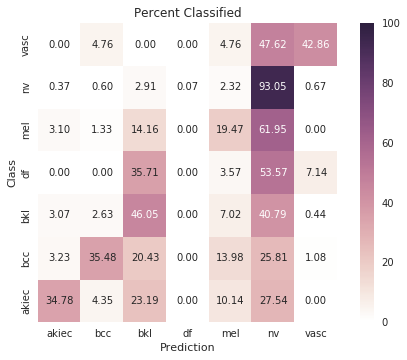

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

conf_arr = confusion_matrix(labels, y_pred)

s = conf_arr.sum(axis = 1)

conf_arr = (conf_arr * 100.0) / s[:,None]

conf_arr = np.nan_to_num(conf_arr)

df_cm = pd.DataFrame(conf_arr, 
  index = names,
  columns = names)

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

res.invert_yaxis()

plt.yticks(np.arange(len(names)) + .5, names,va='center')

plt.title('Percent Classified')
plt.xlabel("Prediction")
plt.ylabel("Class")

plt.savefig('../Figures/best_validation_mobilenet_2.png', dpi=100, bbox_inches='tight' )
plt.show()
plt.close()



labels_named = [reverse[number] for number in labels]
ypred_named = [reverse[number] for number in y_pred]

pred_df = pd.DataFrame()
pred_df["y_true"] = labels_named
pred_df["y_pred"] = ypred_named
pred_df.to_csv("../Figures/sam_classifications.csv")

Try a different architechture

In [10]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [11]:
mobile = tensorflow.keras.applications.mobilenet.MobileNet()
# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.4)(x)

predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)

model.summary()

for layer in model.layers[:-23]:
    layer.trainable = False

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [12]:
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

model.compile(Adam(lr=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [18]:
# where all the data comes from
train_data_dir = im1

# dimensions of our images.
img_width, img_height = 224, 224

nb_train_samples = 6409 * 2
nb_validation_samples = 1603 * 2
nb_test_samples = 2003
epochs = 50
batch_size = 32

# this is the augmentation configuration we will use for training (Nothing!!!)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# all the generators for train, val, and test
train_generator = train_datagen.flow_from_dataframe(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input,
    dataframe = train_dataset,
    directory = train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    x_col = "filename",
    y_col = "label",
    class_mode='categorical')

validation_generator = train_datagen.flow_from_dataframe(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input,
    dataframe = val_dataset,
    directory = train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    x_col = "filename",
    y_col = "label",
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input,
    dataframe = test_dataset,
    directory = train_data_dir,
    target_size= (img_height, img_width),
    batch_size= batch_size,
    x_col = "filename",
    y_col = "label",
    class_mode='categorical',
    shuffle = False)

Found 6409 validated image filenames belonging to 7 classes.
Found 1603 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


In [19]:
mcp = ModelCheckpoint("best_validation_mobilenet.hdf5", monitor="val_categorical_accuracy", save_best_only=True, save_weights_only=False)

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size + 1,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size + 1,
    callbacks=[mcp])

Epoch 1/50
401/401 [==============================] - 900s 2s/step - loss: 0.7523 - categorical_accuracy: 0.7363 - top_2_accuracy: 0.8759 - top_3_accuracy: 0.9407 - val_loss: 2.3854 - val_categorical_accuracy: 0.6594 - val_top_2_accuracy: 0.7877 - val_top_3_accuracy: 0.8398
Epoch 2/50
401/401 [==============================] - 900s 2s/step - loss: 0.5900 - categorical_accuracy: 0.7897 - top_2_accuracy: 0.9160 - top_3_accuracy: 0.9671 - val_loss: 3.1416 - val_categorical_accuracy: 0.6625 - val_top_2_accuracy: 0.7234 - val_top_3_accuracy: 0.8423
Epoch 3/50
401/401 [==============================] - 902s 2s/step - loss: 0.5021 - categorical_accuracy: 0.8172 - top_2_accuracy: 0.9376 - top_3_accuracy: 0.9769 - val_loss: 2.5064 - val_categorical_accuracy: 0.6943 - val_top_2_accuracy: 0.8245 - val_top_3_accuracy: 0.8564
Epoch 4/50
401/401 [==============================] - 882s 2s/step - loss: 0.4586 - categorical_accuracy: 0.8347 - top_2_accuracy: 0.9467 - top_3_accuracy: 0.9815 - val_loss: 

Epoch 31/50
401/401 [==============================] - 884s 2s/step - loss: 0.1156 - categorical_accuracy: 0.9616 - top_2_accuracy: 0.9944 - top_3_accuracy: 0.9990 - val_loss: 4.4502 - val_categorical_accuracy: 0.7053 - val_top_2_accuracy: 0.8027 - val_top_3_accuracy: 0.8554
Epoch 32/50
401/401 [==============================] - 876s 2s/step - loss: 0.1007 - categorical_accuracy: 0.9658 - top_2_accuracy: 0.9959 - top_3_accuracy: 0.9989 - val_loss: 3.7542 - val_categorical_accuracy: 0.6825 - val_top_2_accuracy: 0.8455 - val_top_3_accuracy: 0.9163
Epoch 33/50
401/401 [==============================] - 874s 2s/step - loss: 0.1030 - categorical_accuracy: 0.9648 - top_2_accuracy: 0.9958 - top_3_accuracy: 0.9992 - val_loss: 4.0534 - val_categorical_accuracy: 0.6734 - val_top_2_accuracy: 0.7827 - val_top_3_accuracy: 0.8564
Epoch 34/50
401/401 [==============================] - 877s 2s/step - loss: 0.1084 - categorical_accuracy: 0.9640 - top_2_accuracy: 0.9952 - top_3_accuracy: 0.9996 - val_lo

In [ ]:
https://www.kaggle.com/vbookshelf